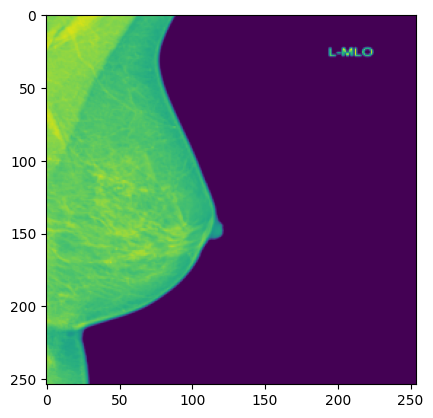

In [65]:
#!pip install pydicom
#!pip install scikit-image
import pydicom as dicom
import matplotlib.pylab as plt
from skimage.transform import resize

# specify your image path
image_path = 'train_images/5/640805896.dcm'
ds = dicom.dcmread(image_path)
#print(type(ds))
#plt.imshow(ds.pixel_array)
#plt.show()
#print(ds)
#ds.file_meta
# convert to RGB image
image = ds.pixel_array
image.shape
# configure the pixel size
IMG_PX_SIZE = 254
resized_img = resize(image, (IMG_PX_SIZE, IMG_PX_SIZE), anti_aliasing=True)
resized_img.shape
plt.imshow(resized_img)
plt.savefig("training/saved_image.jpg")

In [83]:
import shutil
import os

source = 'train_images'
# This recursive_copy function is used to copy all .dcm files in the subdirectory 
# of train_images to train_set

def recursive_copy(path):
    for f in sorted(os.listdir(os.path.join(os.getcwd(), path))):
        file = os.path.join(path, f)
        if os.path.isfile(file):
            file_name = 'train_set/'+f
            shutil.move(file, file_name)
        else:
            recursive_copy(file)
            
recursive_copy(source)

In [38]:
import pandas as pd

#Load Data In Pandas
df_train = pd.read_csv('train.csv')
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


0 site_id - ID code for the source hospital.

1 patient_id - ID code for the patient.

2 image_id - ID code for the image.

3 laterality - Whether the image is of the left or right breast.

4 view - The orientation of the image. The default for a screening exam is to capture two views per breast.

5 age - The patient's age in years.

6 <span style='background :yellow' > cancer - Whether or not the breast was positive (0) for malignant cancer (1). </span> The target value. Only provided for train.

7 biopsy - Whether or not a follow-up biopsy was performed on the breast. Only provided for train.

8 invasive - If the breast is positive for cancer, whether or not the cancer proved to be invasive. Only provided for train.

9 BIRADS - 0 if the breast required follow-up, 1 if the breast was rated as negative for cancer, and 2 if the breast was rated as normal. Only provided for train.

10 implant - Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.

11 density - A rating for how dense the breast tissue is, with A being the least dense and D being the most dense. Extremely dense tissue can make diagnosis more difficult. Only provided for train.

12 machine_id - An ID code for the imaging device.

13 difficult_negative_case - True if the case was unusually difficult. Only provided for train.

In [39]:
df_train['cancer'].unique()

array([0, 1])

In [43]:
df_train['cancer'].value_counts()

0    53548
1     1158
Name: cancer, dtype: int64

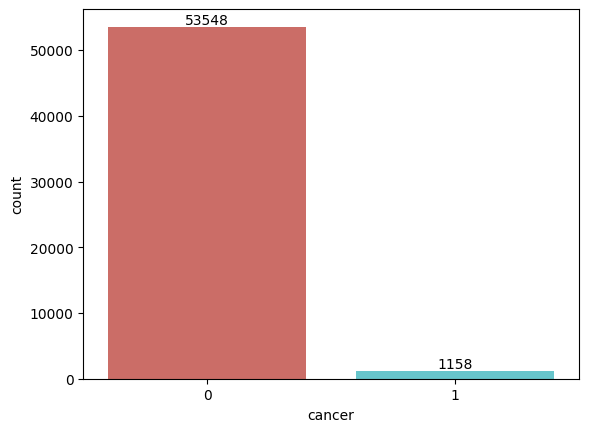

Percentage of Positive is: 97.8832303586444
Percentage of Malignant is: 2.11676964135561


In [44]:
import seaborn as sns # boxplot, histplot

ax=sns.countplot(x='cancer', data=df_train, palette='hls')
plt.bar_label(ax.containers[0])
plt.show()
count_positive = len(df_train[df_train['cancer']==0])
count_malignant = len(df_train[df_train['cancer']==1])
pct_of_positive = count_positive/(count_positive+count_malignant)
print("Percentage of Positive is:", pct_of_positive*100)
pct_of_malignant = count_malignant/(count_positive+count_malignant)
print("Percentage of Malignant is:", pct_of_malignant*100)